#### Now that we've explored some of the functionality of the numpy library and simulated our first straight (sine) grating, let's condense some of our code into a function so that we can generate gratings with different parameters with one line of code, rather than needing multiple lines of code each time we want to simulate a grating. We're also going to write a function to find the coordinates of local maxima of some arbitrary 1D function and eventually, a 2D array so that we can find the local maxima or 'peaks' of an image (why might we want to do this?). Throughout this notebook, I expect you to fail many times on your way to success, this is okay! Do not be discouraged by failure, for it is an opportunity to learn. I am always free to answer questions and work together to solve these problems, they are purposefully difficult and you should struggle with them.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import filter_tools

$1$. Write a brief function in python that plots an input 2D array. Include some relevant keywords (like title or xlabel, etc...) as well as a keyword that I could input (or 'activate' with a True/False value) that would allow me to not show the plot (meaning that it wouldn't plot if I activate it). Talk to me if this instruction doesn't make any sense. If you've already made this function in the previous assignment, feel free to just copy and paste your code, adding the keyword.

In [2]:
help(filter_tools.plot_2D)

def plot_practice(array, Plot=True):
    import filter_tools
    
    if Plot==True:
        filter_tools.plot_2D(array, Title='Add Title', greyscale=True, colorbar=True, vmin=0.0, vmax=None, interpolate='None', x_label='Add x_label', y_label='Add y_label', x_lim=None, y_lim=None, fig_size=(20, 20), fontsize_title=15, fontsize_label=10)
        
    else:
        print('I\'m sorry Dave, I can\'t do that for you.')

Help on function plot_2D in module filter_tools:

plot_2D(array, Title='Add Title', greyscale=True, colorbar=True, vmin=0.0, vmax=None, interpolate='None', x_label='Add x_label', y_label='Add y_label', x_lim=None, y_lim=None, fig_size=(20, 20), fontsize_title=15, fontsize_label=10)



In [3]:
a = [[0,1],[0,1]]
plot_practice(a, Plot=False)

I'm sorry Dave, I can't do that for you.


$2$. What are the relevant parameters (physical features) of a grating that we would want to input as keywords in a python function to generate the grating?

Pitch, diameter, phase or amplitude, angle of rotation of the grating, length of the array in pixels.

$3$. Define a simulate_grating() function with the keywords you decided on in the above problem, and then plot the grating to make sure it looks like you think it should. Make sure to 'return' the grating at the end, so that you can set variables equal to the returned array. 

In [4]:
def simulate_grating(pitch=150, radius=25000, W = 40000, aperture_scale=1., CCD_pixels_side=2048, phase=False, theta=np.pi/6.):
    # This function creates a grating with specifications input as keywords. 
    #It returns the grating array as well as saving the array and plot of the 
    #grating into specified file names.

    import numpy as np

    # Grating specs
    pitch = pitch
    k = 2*np.pi/pitch
    print("pitch = " + str(pitch) + " nm.")
    radius = radius
    print("radius = " + str(radius) + " nm.")
    aperture = radius*aperture_scale
    print("aperture = " + str(aperture*2./1000) + " um.")
    
    # Image specs
    L=2*W

    x = np.linspace(-W,W,CCD_pixels_side, endpoint=True)
    dx = x[1]-x[0]
    dy = dx
    X,Y = np.meshgrid(x,x)

    arg = X*np.cos(theta) - Y*np.sin(theta)
    arg2 = Y*np.cos(theta) + X*np.sin(theta)

    if phase==False:
        grating = (1+np.cos((2*np.pi/pitch)*(arg + m*np.arctan2(arg2,arg))))/2. * (np.sqrt((X)**2+(Y)**2) < aperture)
    else:
        grating = np.exp(1.j*(1+np.cos(k*(arg))/2.)) * (np.sqrt((X)**2+(Y)**2) < aperture)

    return grating

D = 50 *1000 # nm grating diameter
R = D/2.  # nm grating radius
W = 30 *1000 # nm half of the image length
N = 2048 # number of pixels on length of image (W [pix])
d = 0.5 *1000 # nm pitch


theta = -np.pi/4. #radian rotation of grating

grating = simulate_grating(pitch=d, radius=R, aperture_scale=1., W=W, CCD_pixels_side=N, phase=True, theta=theta)



pitch = 500.0 nm.
radius = 25000.0 nm.
aperture = 50.0 um.


$4.$ Plot the FFT of the grating above.

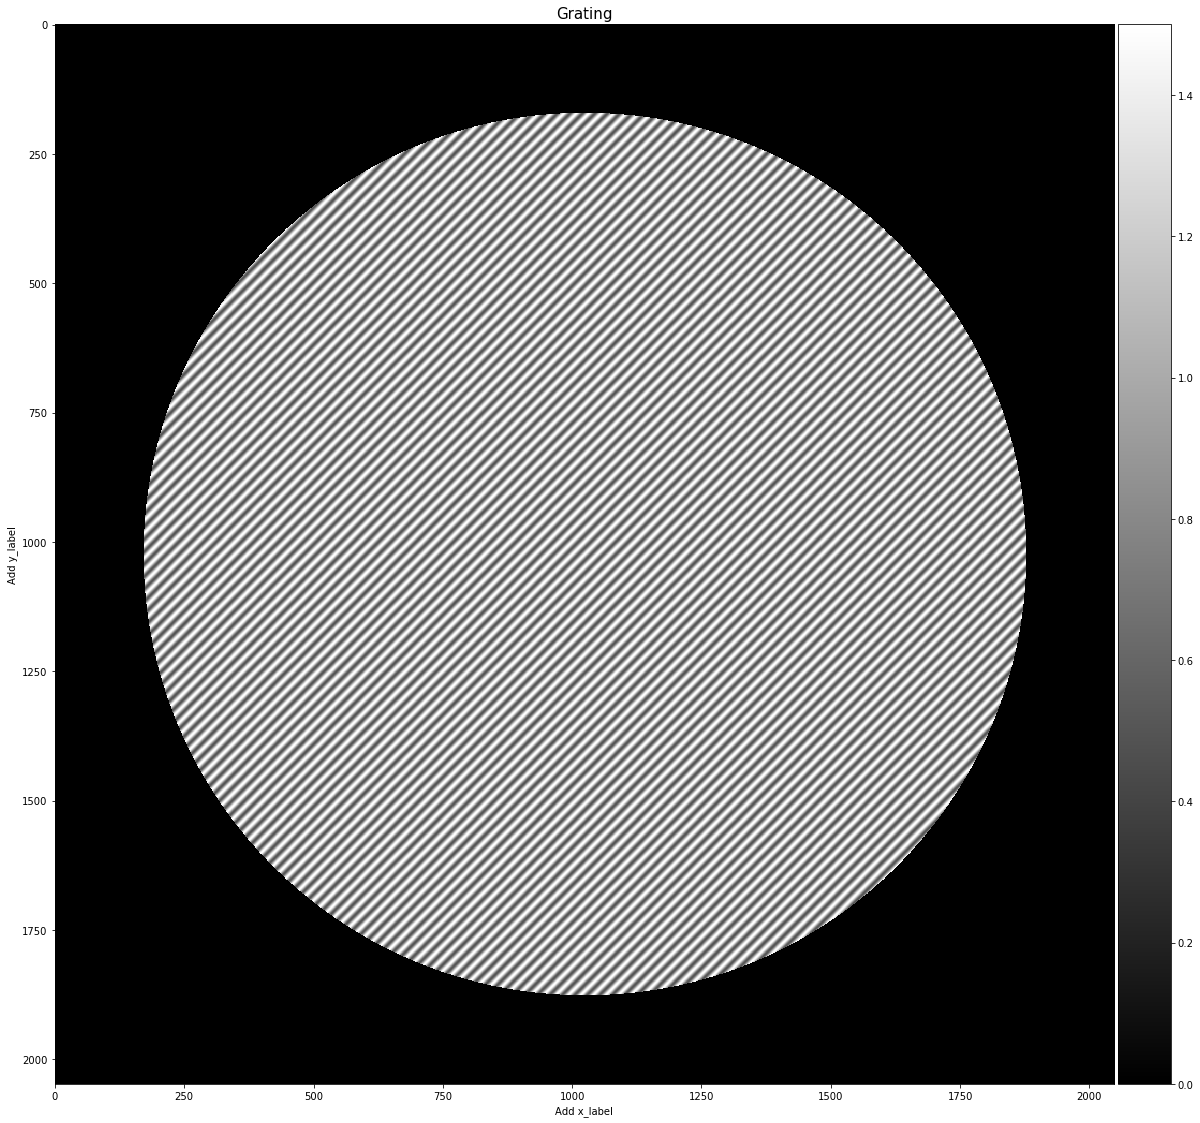

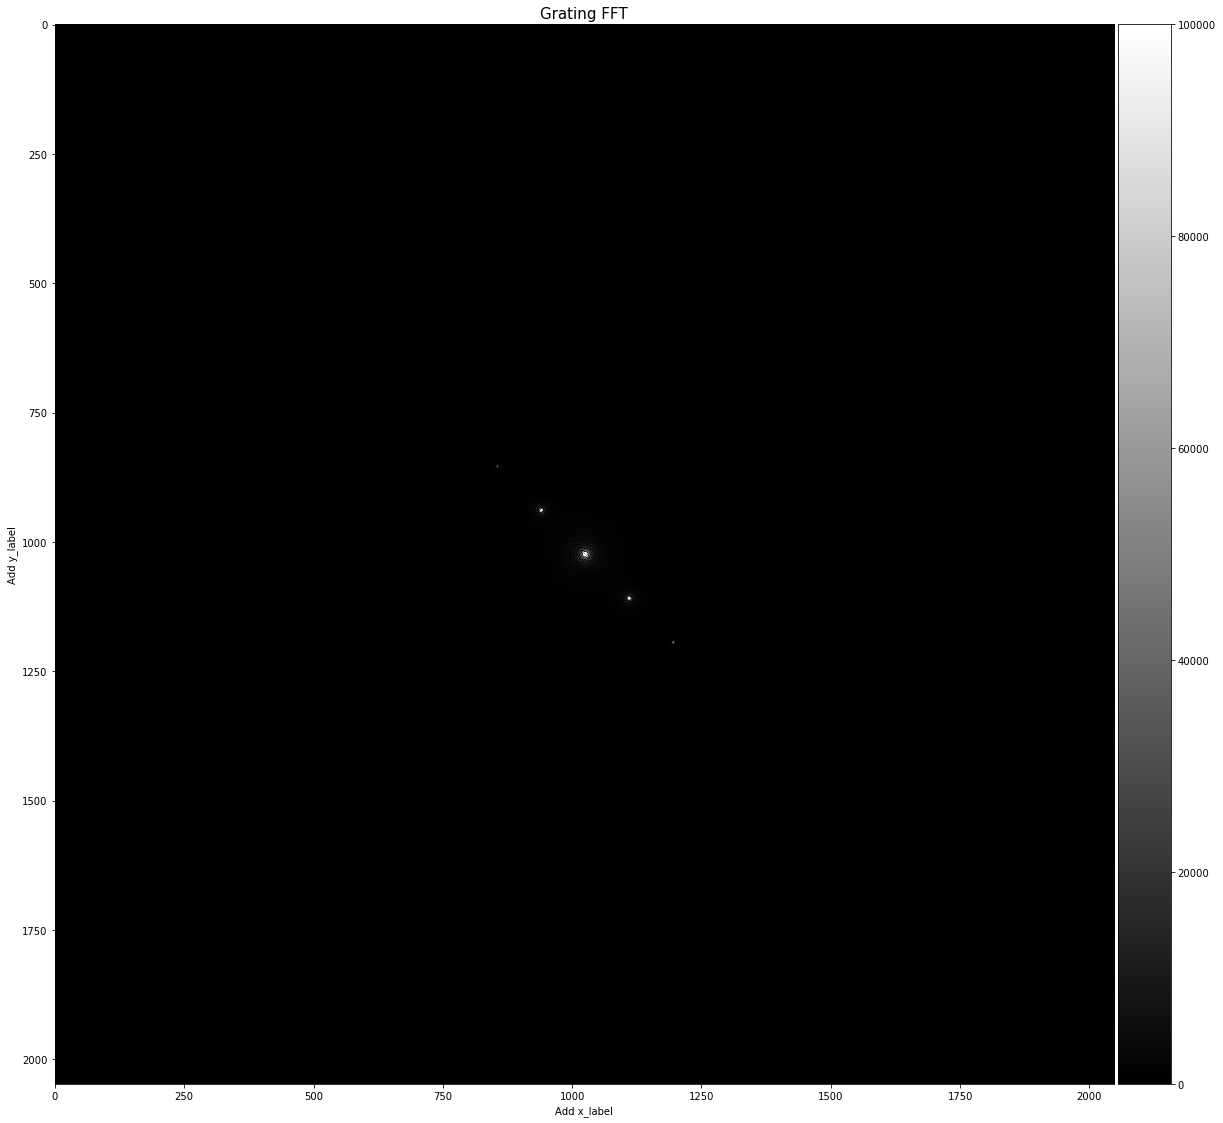

In [5]:
filter_tools.plot_2D(np.angle(grating), Title='Grating', greyscale=True, colorbar=True, vmin=0.0, vmax=None, interpolate='None', x_label='Add x_label', y_label='Add y_label', x_lim=None, y_lim=None, fig_size=(20, 20), fontsize_title=15, fontsize_label=10)

grating_fft = np.abs(np.fft.fftshift(np.fft.fft2(grating)))

filter_tools.plot_2D(grating_fft, Title='Grating FFT', greyscale=True, colorbar=True, vmin=0.0, vmax=10**5, interpolate='None', x_label='Add x_label', y_label='Add y_label', x_lim=None, y_lim=None, fig_size=(20, 20), fontsize_title=15, fontsize_label=10)

$5$. Write some code to take a slice of the FFT array to 'isolate' the first order diffraction peak. Locate the peak manually first, you will write some code later to find the peaks in this array. Plot the image of the peak, which should be a smaller array than the FFT array. Note that what you're doing here is the exact same function as any image processing software (like photoshop), when you crop an image.

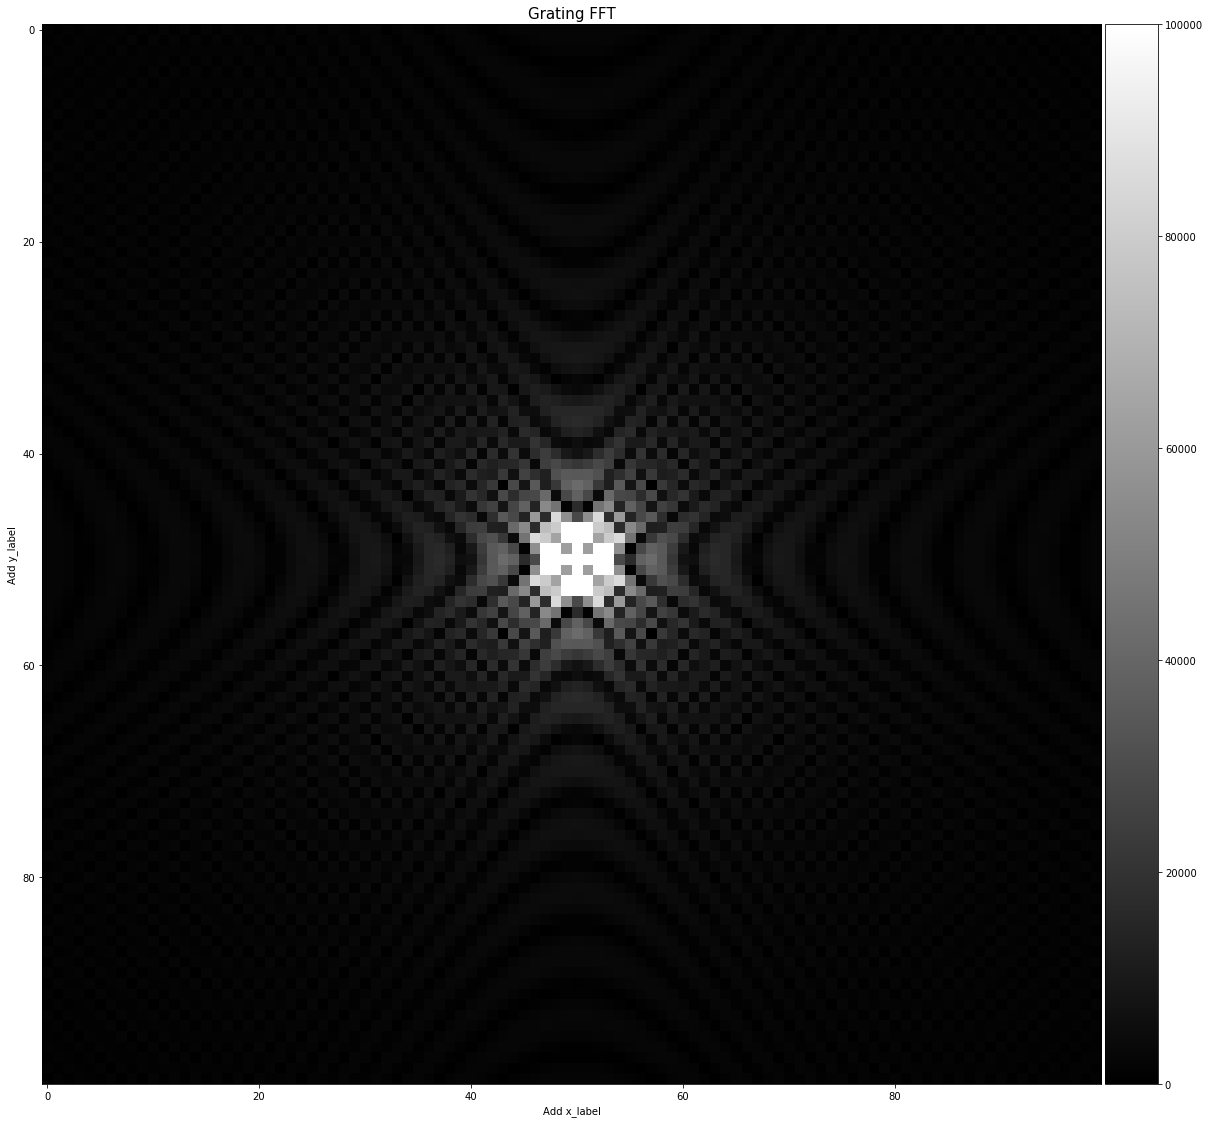

In [6]:
middle = len(grating_fft)//2
box_len = 100
box = slice(middle-box_len//2,middle+box_len//2), slice(middle-box_len//2,middle+box_len//2)

filter_tools.plot_2D(grating_fft[box], Title='Grating FFT', greyscale=True, colorbar=True, vmin=0.0, vmax=10**5, interpolate='None', x_label='Add x_label', y_label='Add y_label', x_lim=None, y_lim=None, fig_size=(20, 20), fontsize_title=15, fontsize_label=10)

$6$. Consider the following function:

$$ f(x) = \left[ 1+cos(x) \right] \cdot e^{-\frac{x^{2}}{100}} $$

Plot the function and comment on some interesting features it has.

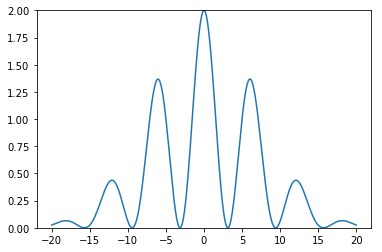

In [7]:
x = np.linspace(-20,20,1000)

f =   (1 + np.cos(x)) * np.exp(-x**2/100.)

plt.plot(x,f)
plt.ylim(0,2)
plt.show()

The function has multiple local maxima as well as a global maxima and goes to zero as x $\rightarrow \infty$

$7$. Write some code to find the coordinates of the local maxima of this function. Feel free to do this anyway you like. If you can find a peak finder online, use it! Also, think about how we find local maxima in calculus (Hint: Derivatives). Also, you'll probably need this function (https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html)

In [8]:
def find_peaks1d(freq_values, fft_array, peak_w = 1, fft=True, freq_min=0, N_peaks=7):
    #Returns the frequency indices in the fft_array as well as their values.
    temp = np.copy(fft_array)
    freq = np.zeros((2,N_peaks))
    for i in range(N_peaks):
        if freq_min>0:
            if fft==True:
                ind = np.where(temp==np.max(temp[freq_min:len(fft_array)/2]))
            else:
                ind = np.where(temp==np.max(temp[freq_min:]))
        if fft==True:
            ind = np.where(temp==np.max(temp[:len(fft_array)/2]))
        else:
            ind = np.where(temp==np.max(temp))
#     print('ind[0][0] = ', ind[0][0])
#     print(peak_w)
#    print("Peak " + str(i) + ": Frequency = " + str(freq_values[ind[0]]))
#    print("FFT Intensity = " + str(temp[ind[0]]))
        if ind[0][0] < peak_w:
            temp[0:peak_w]=np.zeros(peak_w)
        elif len(fft_array)-ind[0][0] < peak_w:
            temp[len(temp)-peak_w:len(temp)]=np.zeros(peak_w)
        else:
            temp[int(ind[0][0]-peak_w/2):int(ind[0][0]+peak_w/2)]=np.zeros(peak_w)
#     print('ind = ' + str(ind))

        freq[0,i] = int(ind[0][0])
        freq[1,i] = freq_values[ind[0][0]]
    return freq

In [9]:
ind = find_peaks1d(x,f, peak_w=145, fft=False)
x_pix = np.array(ind[0], dtype=int)

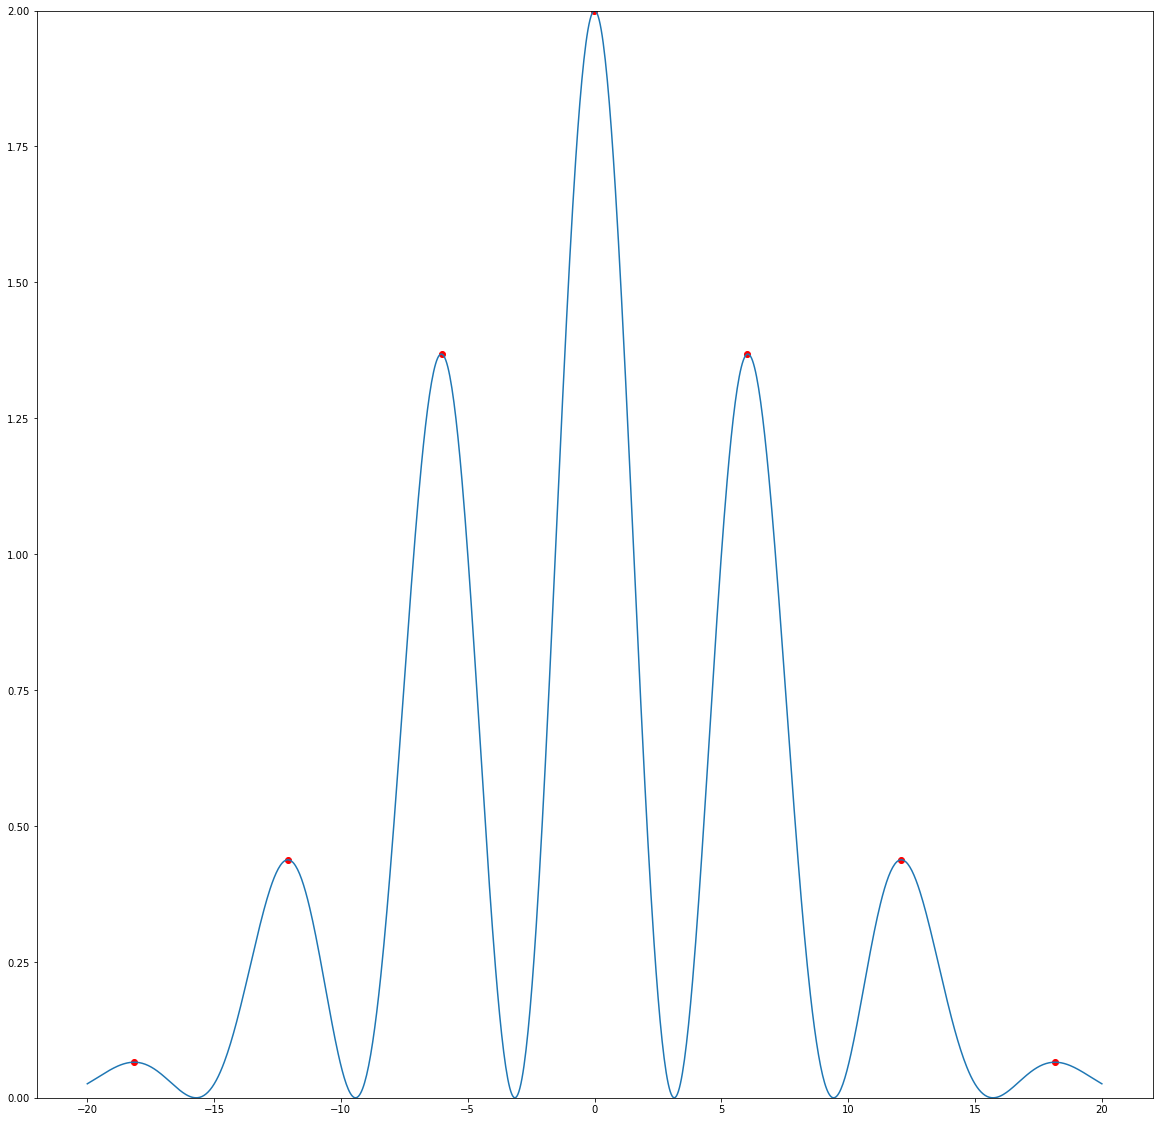

In [10]:
plt.figure(figsize=(20,20))
plt.plot(x,f)
plt.scatter(ind[1], f[x_pix], c='r')
plt.ylim(0,2)
plt.show()

$8$. Write this code into a function.

Already did

$9$. Extend this function to find the maxima of 2D arrays. Use this 2D test array to test your function:

In [59]:
a= np.zeros((8,11))
b = np.zeros((4,20))

print(len(np.ravel(a)) > len(np.ravel(b)))

True


In [66]:
def find_peaks(fft, filter_size=5, threshold_factor=1., N_peaks=1, fft_shift=False):
    """This function finds the intensities and coordinates of N_peaks number of peaks in the
    fourier transform of an image. It does this by first setting all pixel values that are threshold_factor
    times the mean pixel value to the mean pixel value and  then expanding the peak to be a box
    filter_size pixels wide and then finding the average x and y indices for that peak."""

    from scipy.ndimage.filters import maximum_filter
    from filter_tools import peak_block

    if fft_shift==False:
        fftshift = np.abs(np.fft.fftshift(fft))
    else:
        fftshift = np.abs(fft)

    fftshift[np.where(fftshift<=(threshold_factor)*np.mean(fftshift))]=np.mean(fftshift)
    mfft = maximum_filter(fftshift,size=filter_size//2)
    coordinates = []
    fftshift_temp = np.copy(fftshift)
#     plt.imshow(mfft)
#     plt.colorbar()
#     plt.show()
    for i in range(N_peaks):
        ind = np.where(mfft==np.max(mfft))
#         print('ind = ' + str(ind))
        temp1 = np.where((ind[0]-np.min(ind[0])) < filter_size)
        temp2 = np.where((ind[1]-np.min(ind[1])) < filter_size)
        if len(np.ravel(temp1)) > len(np.ravel(temp2)):
            peak_ind = temp2
#             peak_ind = np.where(np.logical_and(np.where((ind[0]-np.min(ind[0])) < filter_size), np.where((ind[1]-np.min(ind[1])) < filter_size))==True)[0]
        else:
            peak_ind = temp1
#         print('peak_ind = ' + str(peak_ind))
        coordinates += [[int(np.mean(ind[0][peak_ind])), int(np.mean(ind[1][peak_ind]))]]
        
#         fftshift[coordinates[i][0]-filter_size//2:coordinates[i][0]+filter_size//2,coordinates[i][1]-filter_size//2:coordinates[i][1]+filter_size//2] = np.mean(fft_shift)
        
        fftshift_temp = peak_block(fftshift_temp, r=filter_size, x_ind=coordinates[i][1], y_ind=coordinates[i][0])


        mfft = maximum_filter(fftshift_temp,size=filter_size//2)
    return coordinates


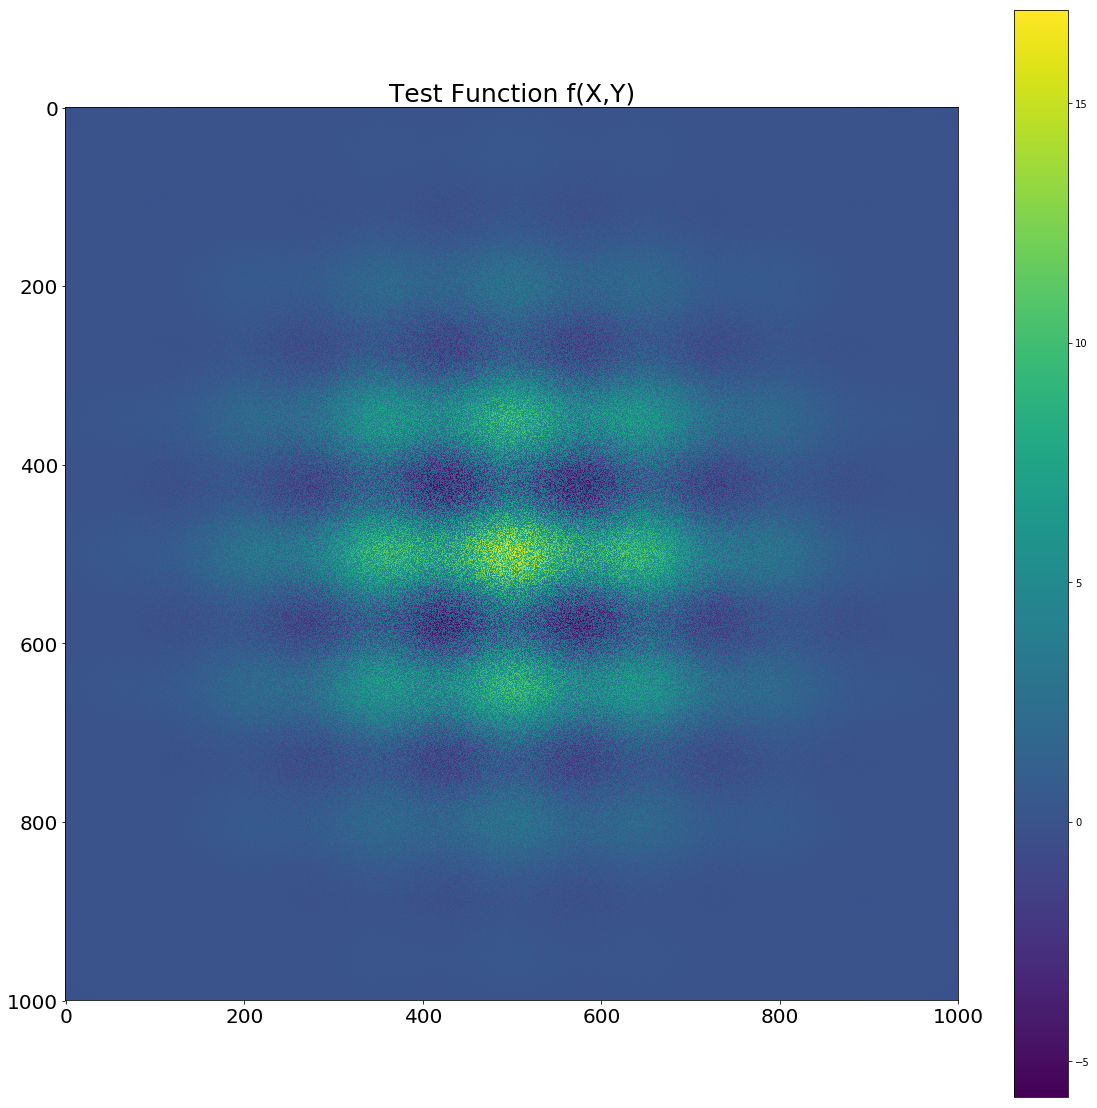

In [143]:
x = np.linspace(-20,20,1000)
X,Y = np.meshgrid(x, x)

f =  (10.*np.random.rand(np.shape(X)[0],np.shape(X)[1]) + 2.*np.cos(X) + 5.*np.cos(Y)) * 1. * np.exp(-(X**2 + Y**2)/100.)

plt.figure(figsize=(20,20))
plt.imshow(f)
plt.title("Test Function f(X,Y)", fontsize=25)
plt.colorbar()
plt.tick_params(labelsize=20)
plt.show()

In [144]:
ind = np.array(find_peaks(f, filter_size=120, N_peaks=9, fft_shift=True, threshold_factor=12/3.))
print(ind)

[[501 503]
 [498 357]
 [500 640]
 [351 497]
 [651 498]
 [352 373]
 [650 370]
 [355 633]
 [645 629]]


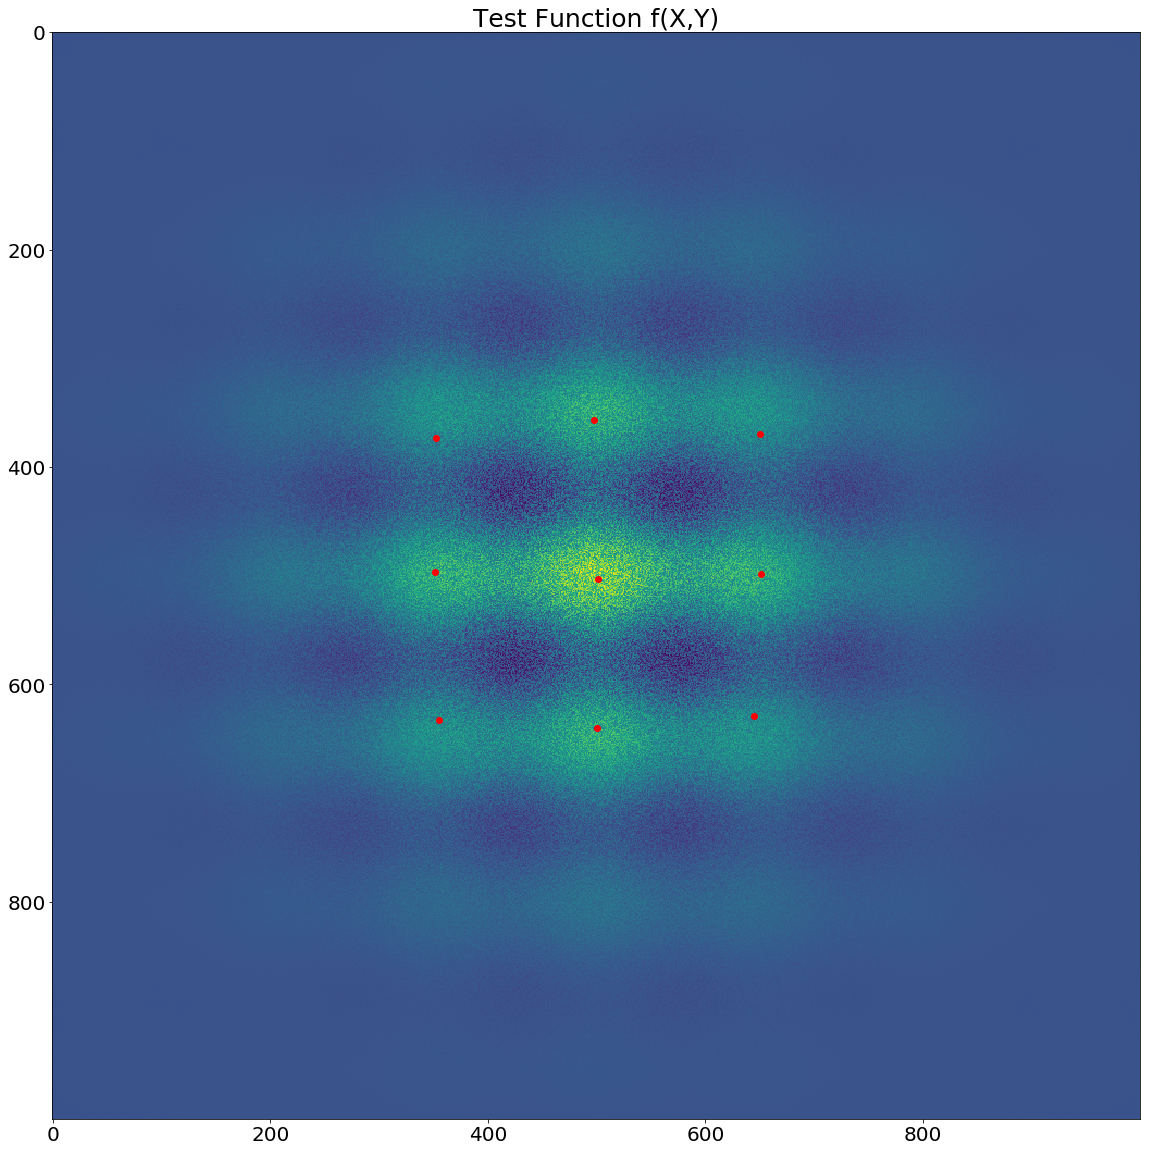

In [145]:
plt.figure(figsize=(20,20))
plt.imshow(f)
plt.scatter(ind[:,0], ind[:,1], marker='o', c='r')
plt.title("Test Function f(X,Y)", fontsize=25)
# plt.colorbar()
plt.tick_params(labelsize=20)
plt.show()